# Лабораторная работа 2

**Внимание!** За эту работу можно получить не более 10 баллов. Так что вы можете выбрать, какие из заданий вам более интересны, и делать их. Оценка будет равна минимуму из 10 и полученного вами числа баллов.

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [35]:
import numpy as np
import scipy as sp

data_train = np.loadtxt('/Users/alina/Downloads/train.txt', delimiter=',')
data_test = np.loadtxt('/Users/alina/Downloads/test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [2]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]


Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [3]:
size = len(X_train)
one = np.ones((size, 1)) # столбец единиц, который отвечает за коэффицент b линейной функции y = kx + b
Main = np.zeros((size, 1)) # столбец, который мы заполним и он будет отвечать за коэффицент k 
for i in range(size):
    Main[i, 0] = X_train[i]
Main = np.concatenate((one, Main), axis=1) # добавляем заполненный столбец
# применяем формулу
Maint = np.transpose(Main)
middle = np.linalg.inv(np.dot(Maint, Main))
a = np.dot(np.dot(middle, Maint), y_train)

Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

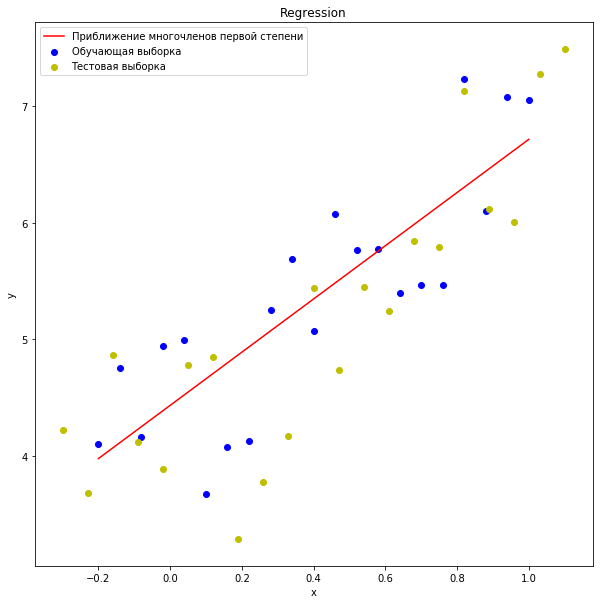

'\nВ целом если посмотреть на точки и мысленно связать их одной линией, то можно насчитать 10 перегибов функции. Понятно, что \nстепень должна быть тогда хотя бы 11. Но предположим, что будет возникать проблема переобучения и лучше \nбудет приближать многочленом шестой степени. А теперь в следующем задании посмотроим эти многочлены (и шестой степени\nсоотвественно) и найдем среднеквадратические ошибки. И сравним с предположением.\n'

In [20]:
import matplotlib.pyplot as plt
x1 = X_train
y1 = y_train
plt.figure(figsize=(10, 10))
plt.scatter(x1, y1, color='b', label="Обучающая выборка") # рисуем точки
plt.scatter(X_test, y_test, color='y', label="Тестовая выборка")
plt.legend("")
x2 = X_train
y2 = x2 * a[1] + a[0]
plt.plot(x2, y2, color='r', label="Приближение многочленом первой степени") # рисуем прямую
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')
plt.legend(loc='upper left')
plt.show()
'''
В целом если посмотреть на точки и мысленно связать их одной линией, то можно насчитать 10 перегибов функции. Понятно, что 
степень должна быть тогда хотя бы 11. Но предположим, что будет возникать проблема переобучения и лучше 
будет приближать многочленом шестой степени. А теперь в следующем задании посмотроим эти многочлены (и шестой степени
соотвественно) и найдем среднеквадратические ошибки. И сравним с предположением.
'''

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Многочлен степени  1  :  [4.43323091 2.2791345 ]
Среднеквадратичная ошибка на обучающих данных: 
0.29689663326251964
Среднеквадратичная ошибка на тестовых данных: 
0.4351202004048878
Многочлен степени  2  :  [4.4724765  1.15783169 1.40162851]
Среднеквадратичная ошибка на обучающих данных: 
0.2696989158766913
Среднеквадратичная ошибка на тестовых данных: 
0.35647628878312543
Многочлен степени  3  :  [ 4.46073636  1.06501611  1.85975084 -0.3817686 ]
Среднеквадратичная ошибка на обучающих данных: 
0.26949718714796095
Среднеквадратичная ошибка на тестовых данных: 
0.3553464571518395
Многочлен степени  4  :  [  4.34116612   1.17180239   6.79409178 -13.05132812   7.9184747 ]
Среднеквадратичная ошибка на обучающих данных: 
0.2610665330579276
Среднеквадратичная ошибка на тестовых данных: 
0.44172701892854443
Многочлен степени  5  :  [  4.43129781  -0.13059804   3.2747144   21.37479628 -51.13148139
  29.52497804]
Среднеквадратичная ошибка на обучающих данных: 
0.24998504648317554
Среднеквадрати

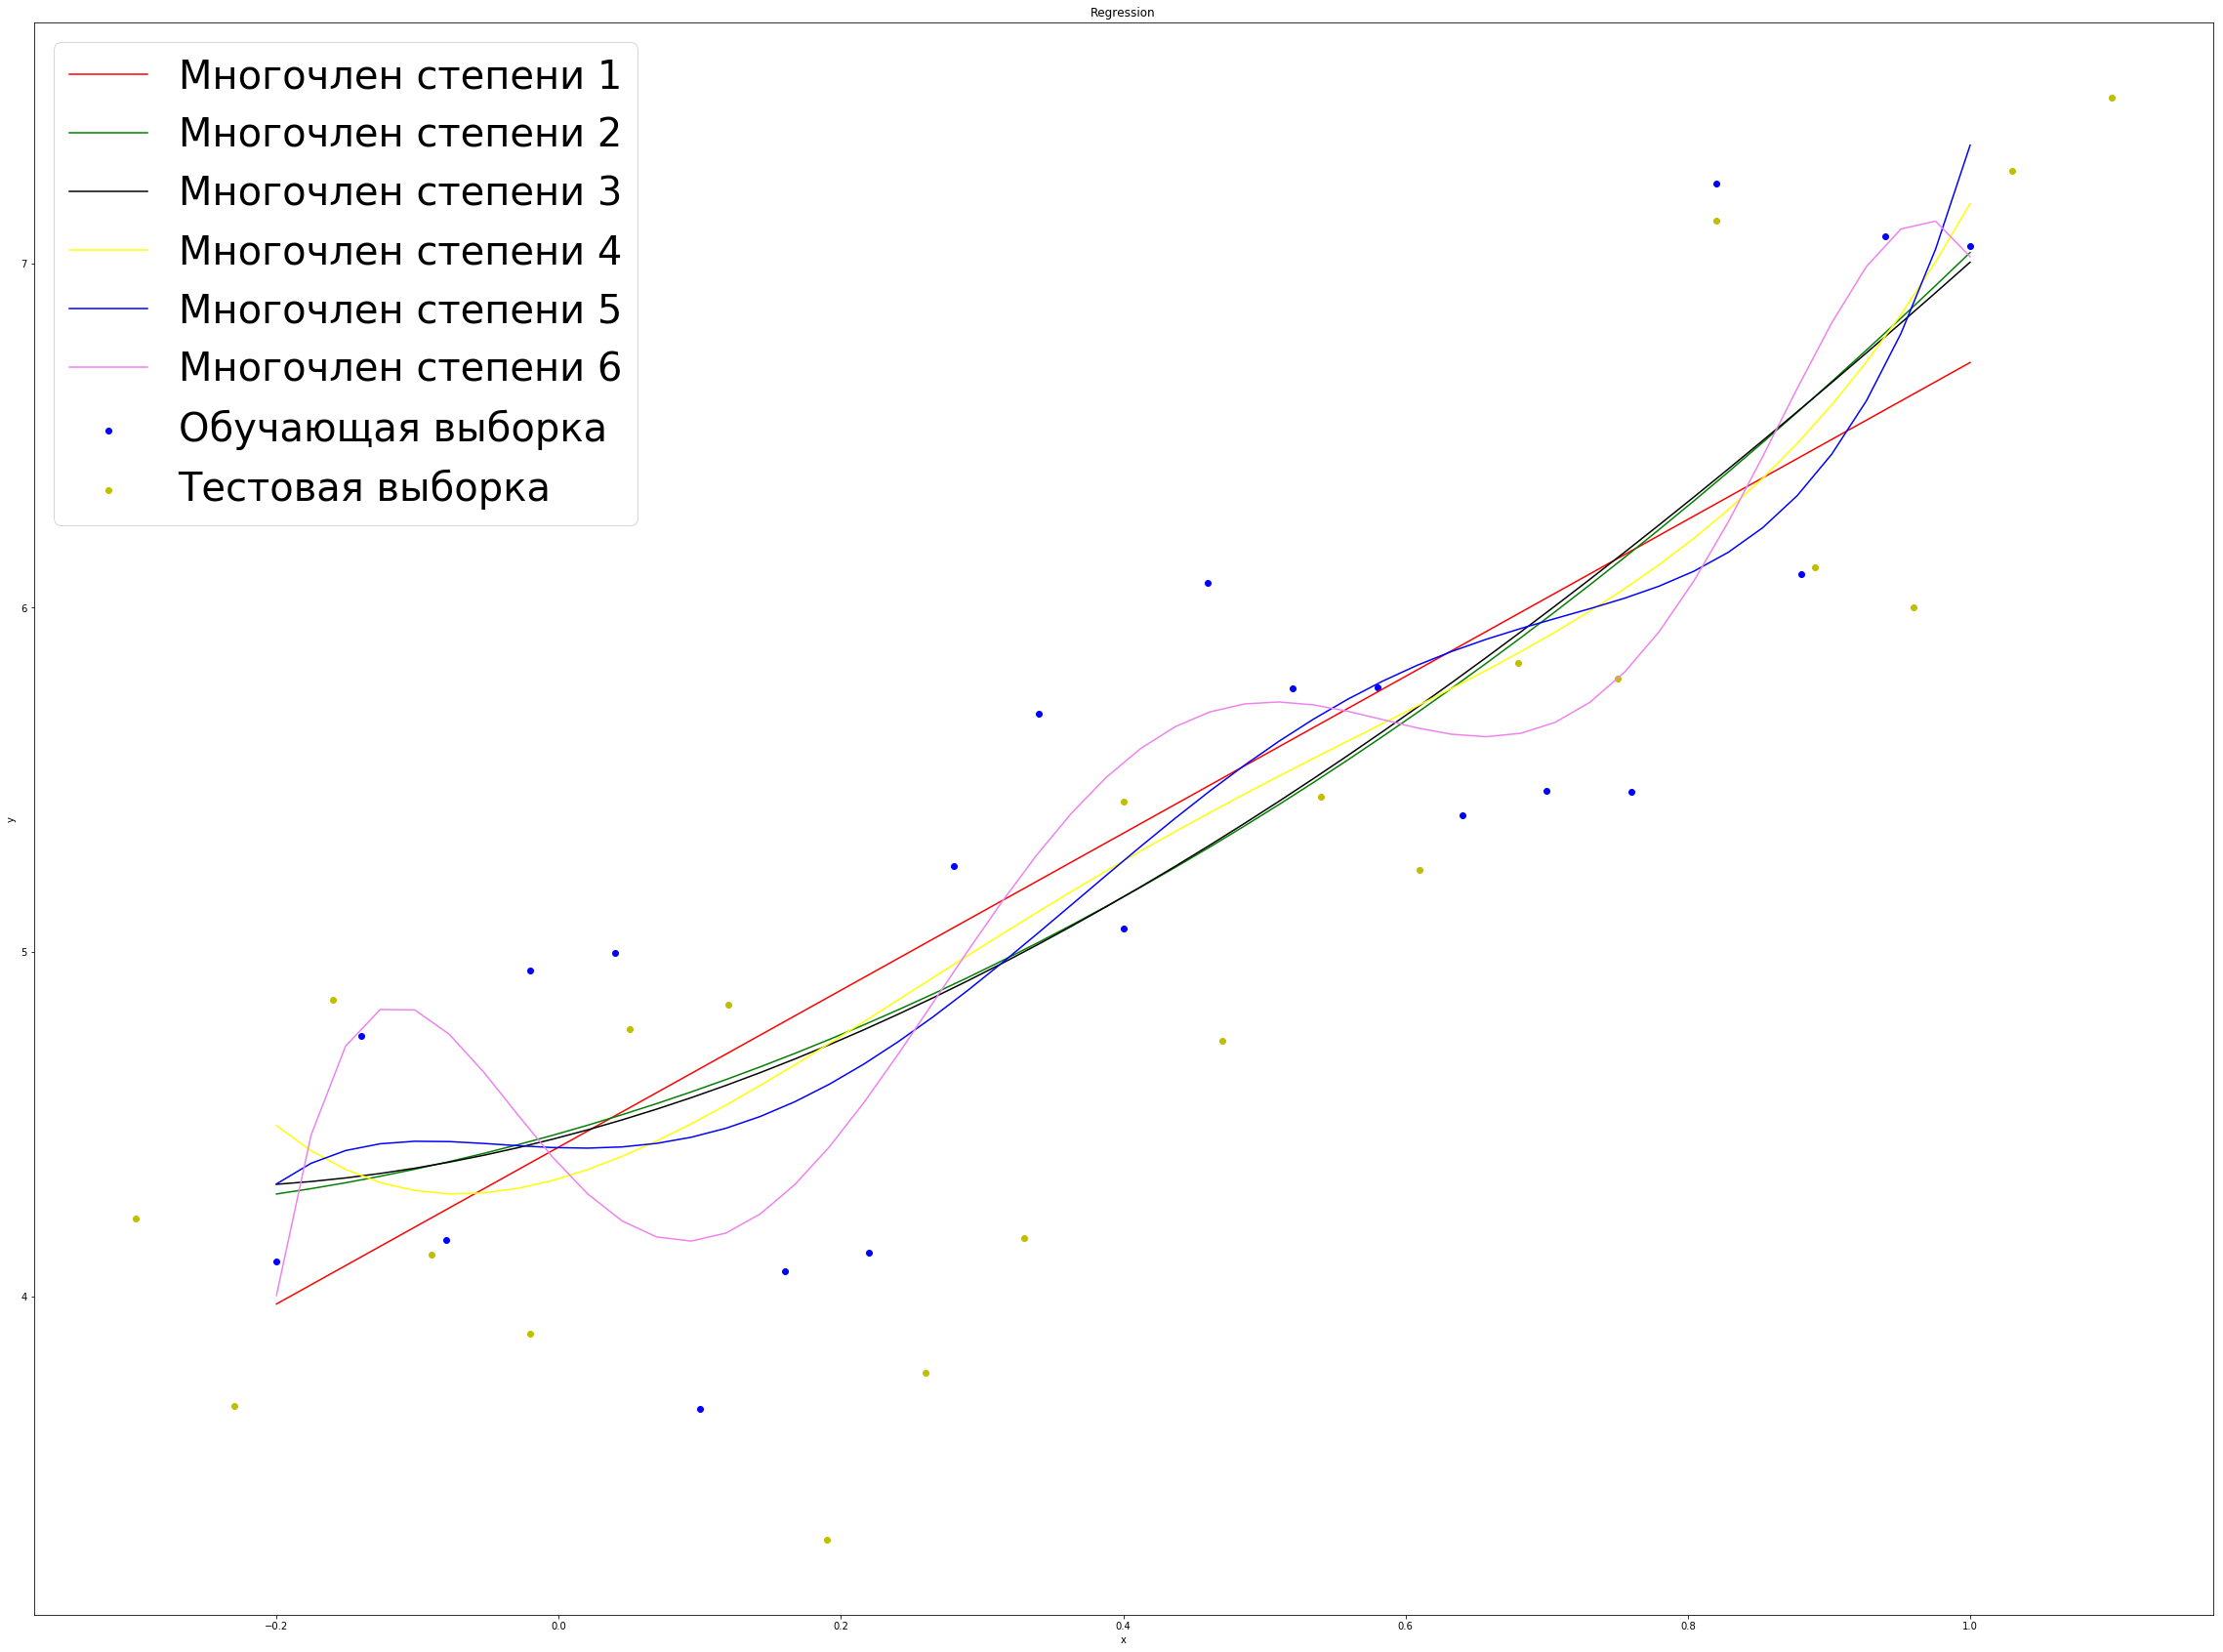

In [33]:
'''
Теперь надо найти многочлены, которые лучше всего приближают неизвестную зависимость. Заметим, что нам просто надо
добавить в качестве новых признаков нашу обучающую выборку в степенях до k. Это логично, так как теперь, приближая
многочленом степени k, линейная комбинация степеней до k каждой отдельной точки выдает нам результат. Поэтому
линейной регрессией мы как и всегда найдем эти коэффиценты, которые будут лучшие для данного набора точек.
'''

x1 = X_train
y1 = y_train
plt.figure(figsize=(40, 30))
plt.scatter(x1, y1, color='b', label="Обучающая выборка") # рисуем точки
plt.scatter(X_test, y_test, color='y', label="Тестовая выборка")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')


def Polynomial(degree): # функция, считающая и матрицу степеней точек обучающей выборки, и вектор a, 
    #в котором и будут коэф-ты многочлена
    res = np.ones((size, 1))
    for i in range(1, degree + 1):
        A = np.zeros((size, 1))
        for j in range(size):
            A[j, 0] = X_train[j] ** i;
        res = np.concatenate((res, A), axis=1)
    Rest = np.transpose(res)
    middle = np.linalg.inv(np.dot(Rest, res))
    a = np.dot(np.dot(middle, Rest), y_train)
    return (res, a)

def MakeTestMatrix(degree): # функция, делающая матрицу степеней точек уже для тестовой выборки
    size = len(X_test)
    res = np.ones((size, 1))
    for i in range(1, degree + 1):
        A = np.zeros((size, 1))
        for j in range(size):
            A[j, 0] = X_test[j] ** i;
        res = np.concatenate((res, A), axis=1)
    return res    

for i in range(1, 11):
    Main, a = Polynomial(i)
    x2 = np.linspace(-0.2, 1, 50)
    y2 = 0
    yx = np.dot(Main, a)
    for j in range(i + 1): # считаем результат для точек x2
        y2 += a[j] * (x2 ** j)
    if (i <= 6):
        if i == 1:
            co = 'r'
        if i == 2:
            co = 'green'
        if i == 3:
            co = 'black'
        if i == 4:
            co = 'yellow'
        if i == 5:
            co = 'blue'
        if i == 6:
            remember = y2 # Понадобится для номера 3
            co = 'violet'
        plt.plot(x2, y2, color=co, label=("Многочлен степени" + ' ' + str(i))) # рисуем результат
    print("Многочлен степени ", i, ' : ', a)
    print("Среднеквадратичная ошибка на обучающих данных: ")
    ar = np.dot(Main, a) - y_train
    summ = 0
    for k in range(len(ar)):
        summ += (ar[k] * ar[k])
    print(summ / size)    
    print("Среднеквадратичная ошибка на тестовых данных: ")
    Main = MakeTestMatrix(i)
    ar = np.dot(Main, a) - y_test
    summ = 0
    for i in range(len(ar)):
        summ += (ar[i] * ar[i])
    print(summ / size)

plt.legend(loc='upper left', fontsize=40)
plt.show()    

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?


Легко заметить, что хоть на обучающей выборке и идет уменьшение ошибки, то с многочлена степени 4 ошибка на тестовой выборке начинает стремительно расти. То есть чрезмерное усложение только ухудшает наше приближение зависимости. Здесь мы столкнулись с проблемой переобучения. Все более "конкретизируя" результаты обучающей выборки, мы тем самым слишком "подгоняем" зависомость под обучающие данные. Поэтому если уже тестовые данные будут как-то случайно разбросаны, то под них зависимость будет совсем не подходить, ведь она не пытается более обще описать эти участки. Скорее всего дело в том, что слишком большая точность на обучающей выборке приводит к тому, что модель начинает находить какие-то случайные закономерности, которых по факту нет на всей выборке. Это все и приводит к показынному выше увеличению значения среднеквадратической ошибки.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [336]:
file = open('/Users/alina/Downloads/flats_moscow_mod.txt', 'r')
count = 0
y = []
A = []
for line in file:
    if count > 0:
        line = line.split()
        y.append([float(line[0])])
        A.append([float(line[1]), float(line[2]), float(line[3]), float(line[4]), float(line[5])])
    count += 1
file.close()
A = np.array(A)
y = np.array(y)
At = np.transpose(A)
middle = np.linalg.inv(np.dot(At, A))
a = np.dot(np.dot(middle, At), y)
print(a) # регрессионные коэффиценты
'''
Мы видим, что коэффиценты при общей, жилой и куханной площади дает положительный вклад, тогда как
расстояние до центра и минуты до метро дают отрицательный вклад. Посмотрев на данные, можно заметить, что в целом
многие квартиры на первый взгляд расположены на расстоянии от пяти-семи километров до центра. Коэффиценты говорят нам,
что такие расстояния больше отталкивают, чем привлекают покупателей, ведь цена согласно регрессионным коэффицентам, 
снижается из-за этого. То же самое с расстоянием до метро. Думаю, что это скорее согласуется с нашими представлениями о жизни,
в отличие от того, что среди всех площадей жилая площадь имеет самый маленький вес. Это довольно странно, так как по
опыту на это смотришь чуть ли не в первую очередь вместе с общей площадью, а та же площадь кухни интересует намного
меньше.
'''
ar = np.dot(A, a) - y
summ = 0
for k in range(len(ar)):
    summ += (ar[k] * ar[k])
print(summ / len(ar)) # Значение среднеквадратической ошибки

[[ 1.55478407]
 [ 1.1740233 ]
 [ 1.7580582 ]
 [-3.9168122 ]
 [-1.55138246]]
[935.78874565]


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [344]:
 from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.33, random_state=42)
#Сначала посчитаем среднеквадратическую ошибку на тестовых данных на упрощенной модели:
Xt = np.transpose(X_train)
middle = np.linalg.inv(np.dot(Xt, X_train))
a = np.dot(np.dot(middle, Xt), y_train)
ar = np.dot(X_test, a) - y_test
summ = 0
for i in range(len(ar)):
    summ += (ar[i] * ar[i])
print('среднеквадратическая ошибка на тестовых данных на упрощенной модели:', summ / len(ar))
# добавим квадрат жилой площади, так как мой опыт подсказывает, что именно на это обращают много внимания
# также добавим произведение расстояния до центра и минуты до метро, так как эти два пункта связаны, опять же по опыту
# если неблизко до центра, то хотя бы чтобы было до метро недолго и можно было бы доехать быстро
size = len(X_train)

def MakeNewMatrix(A):
    add = np.zeros((len(A), 2))
    for i in range(len(A)):
        add[i, 0] = A[i, 1] * A[i, 1]
        add[i, 1] = A[i, 3] * A[i, 4]
    A = numpy.concatenate((A, add), axis=1)
    return A

X_train = MakeNewMatrix(X_train)
Xt = np.transpose(X_train)
middle = np.linalg.inv(np.dot(Xt, X_train))
a = np.dot(np.dot(middle, Xt), y_train)
X_test = MakeNewMatrix(X_test)
ar = np.dot(X_test, a) - y_test
summ = 0
for i in range(len(ar)):
    summ += (ar[i] * ar[i])
print('среднеквадратическая ошибка на тестовых данных на более сложной модели:', summ / len(ar))
# теперь попробуем добавить логорифм площади кухни и логорифм расстояния до метро в минутах
# Я бы обосновал это тем, что на площадь кухни мы, конечно, обращаем внимание, но, наверное, в целом меньше, чем
# на такие параметры, как жилая площадь и расстояние до центра
#Аналогично, с минутами до метро

def MakeBrandNewMatrix(A):
    add = np.zeros((len(A), 2))
    for i in range(len(A)):
        add[i, 0] = np.log(A[i, 2])
        add[i, 1] = np.log(A[i, 4])
    A = numpy.concatenate((A, add), axis=1)
    return A

X_train = MakeBrandNewMatrix(X_train)
Xt = np.transpose(X_train)
middle = np.linalg.inv(np.dot(Xt, X_train))
a = np.dot(np.dot(middle, Xt), y_train)
X_test = MakeBrandNewMatrix(X_test)
ar = np.dot(X_test, a) - y_test
summ = 0
for i in range(len(ar)):
    summ += (ar[i] * ar[i])
print('среднеквадратическая ошибка на тестовых данных на еще более сложной модели:', summ / len(ar))

# добавим корень из общей площади и произведение общей площади, жилой площади и кухни
# На общую площадь в целом мы смотрим мало по сравнению с жилой площадью, поэтому добавим ее корень
# А все ответственное за площадь добавим в качестве произведения

def MakeSuperNewMatrix(A):
    add = np.zeros((len(A), 2))
    for i in range(len(A)):
        add[i, 0] = np.sqrt(A[i, 0])
        add[i, 1] = A[i, 0] * A[i, 1] * A[i, 2]
    A = numpy.concatenate((A, add), axis=1)
    return A

X_train = MakeSuperNewMatrix(X_train)
Xt = np.transpose(X_train)
middle = np.linalg.inv(np.dot(Xt, X_train))
a = np.dot(np.dot(middle, Xt), y_train)
X_test = MakeSuperNewMatrix(X_test)
ar = np.dot(X_test, a) - y_test
summ = 0
for i in range(len(ar)):
    summ += (ar[i] * ar[i])
print('среднеквадратическая ошибка на тестовых данных на супер сложной модели:', summ / len(ar))

среднеквадратическая ошибка на тестовых данных на упрощенной модели: [1080.71544648]
среднеквадратическая ошибка на тестовых данных на более сложной модели: [981.94433999]
среднеквадратическая ошибка на тестовых данных на еще более сложной модели: [907.30560364]
среднеквадратическая ошибка на тестовых данных на супер сложной модели: [817.92411303]


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [46]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

data_train = np.loadtxt('/Users/alina/Downloads/train.txt', delimiter=',')
data_test = np.loadtxt('/Users/alina/Downloads/test.txt', delimiter=',')

X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]


def Polynomial(degree):
    res = np.ones((size, 1))
    for i in range(1, degree + 1):
        A = np.zeros((size, 1))
        for j in range(size):
            A[j, 0] = X_train[j] ** i;
        res = np.concatenate((res, A), axis=1)
    Rest = np.transpose(res)
    # Возьмем L(лямбда) равное 1
    L = 1
    middle = np.linalg.inv(np.dot(Rest, res) + L * np.eye(7))
    a = np.dot(np.dot(middle, Rest), y_train)
    return (res, a)

def MakeTestMatrix(degree):
    size = len(X_test)
    res = np.ones((size, 1))
    for i in range(1, degree + 1):
        A = np.zeros((size, 1))
        for j in range(size):
            A[j, 0] = X_test[j] ** i;
        res = np.concatenate((res, A), axis=1)
    return res 

# нужна ошибка на тестовых данных <= 0,35
Main, a = Polynomial(6)
print("Среднеквадратичная ошибка на обучающих данных: ")
ar = np.dot(Main, a) - y_train
summ = 0
for k in range(len(ar)):
    summ += (ar[k] * ar[k])
print(summ / size)    
print("Среднеквадратичная ошибка на тестовых данных: ")
Main = MakeTestMatrix(6)
ar = np.dot(Main, a) - y_test
summ = 0
for i in range(len(ar)):
    summ += (ar[i] * ar[i])
print(summ / size)

# Как мы видим, ошибка стала равна 0.30, что нам и нужно было

Среднеквадратичная ошибка на обучающих данных: 
0.31961107399035465
Среднеквадратичная ошибка на тестовых данных: 
0.30821992357122713


Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

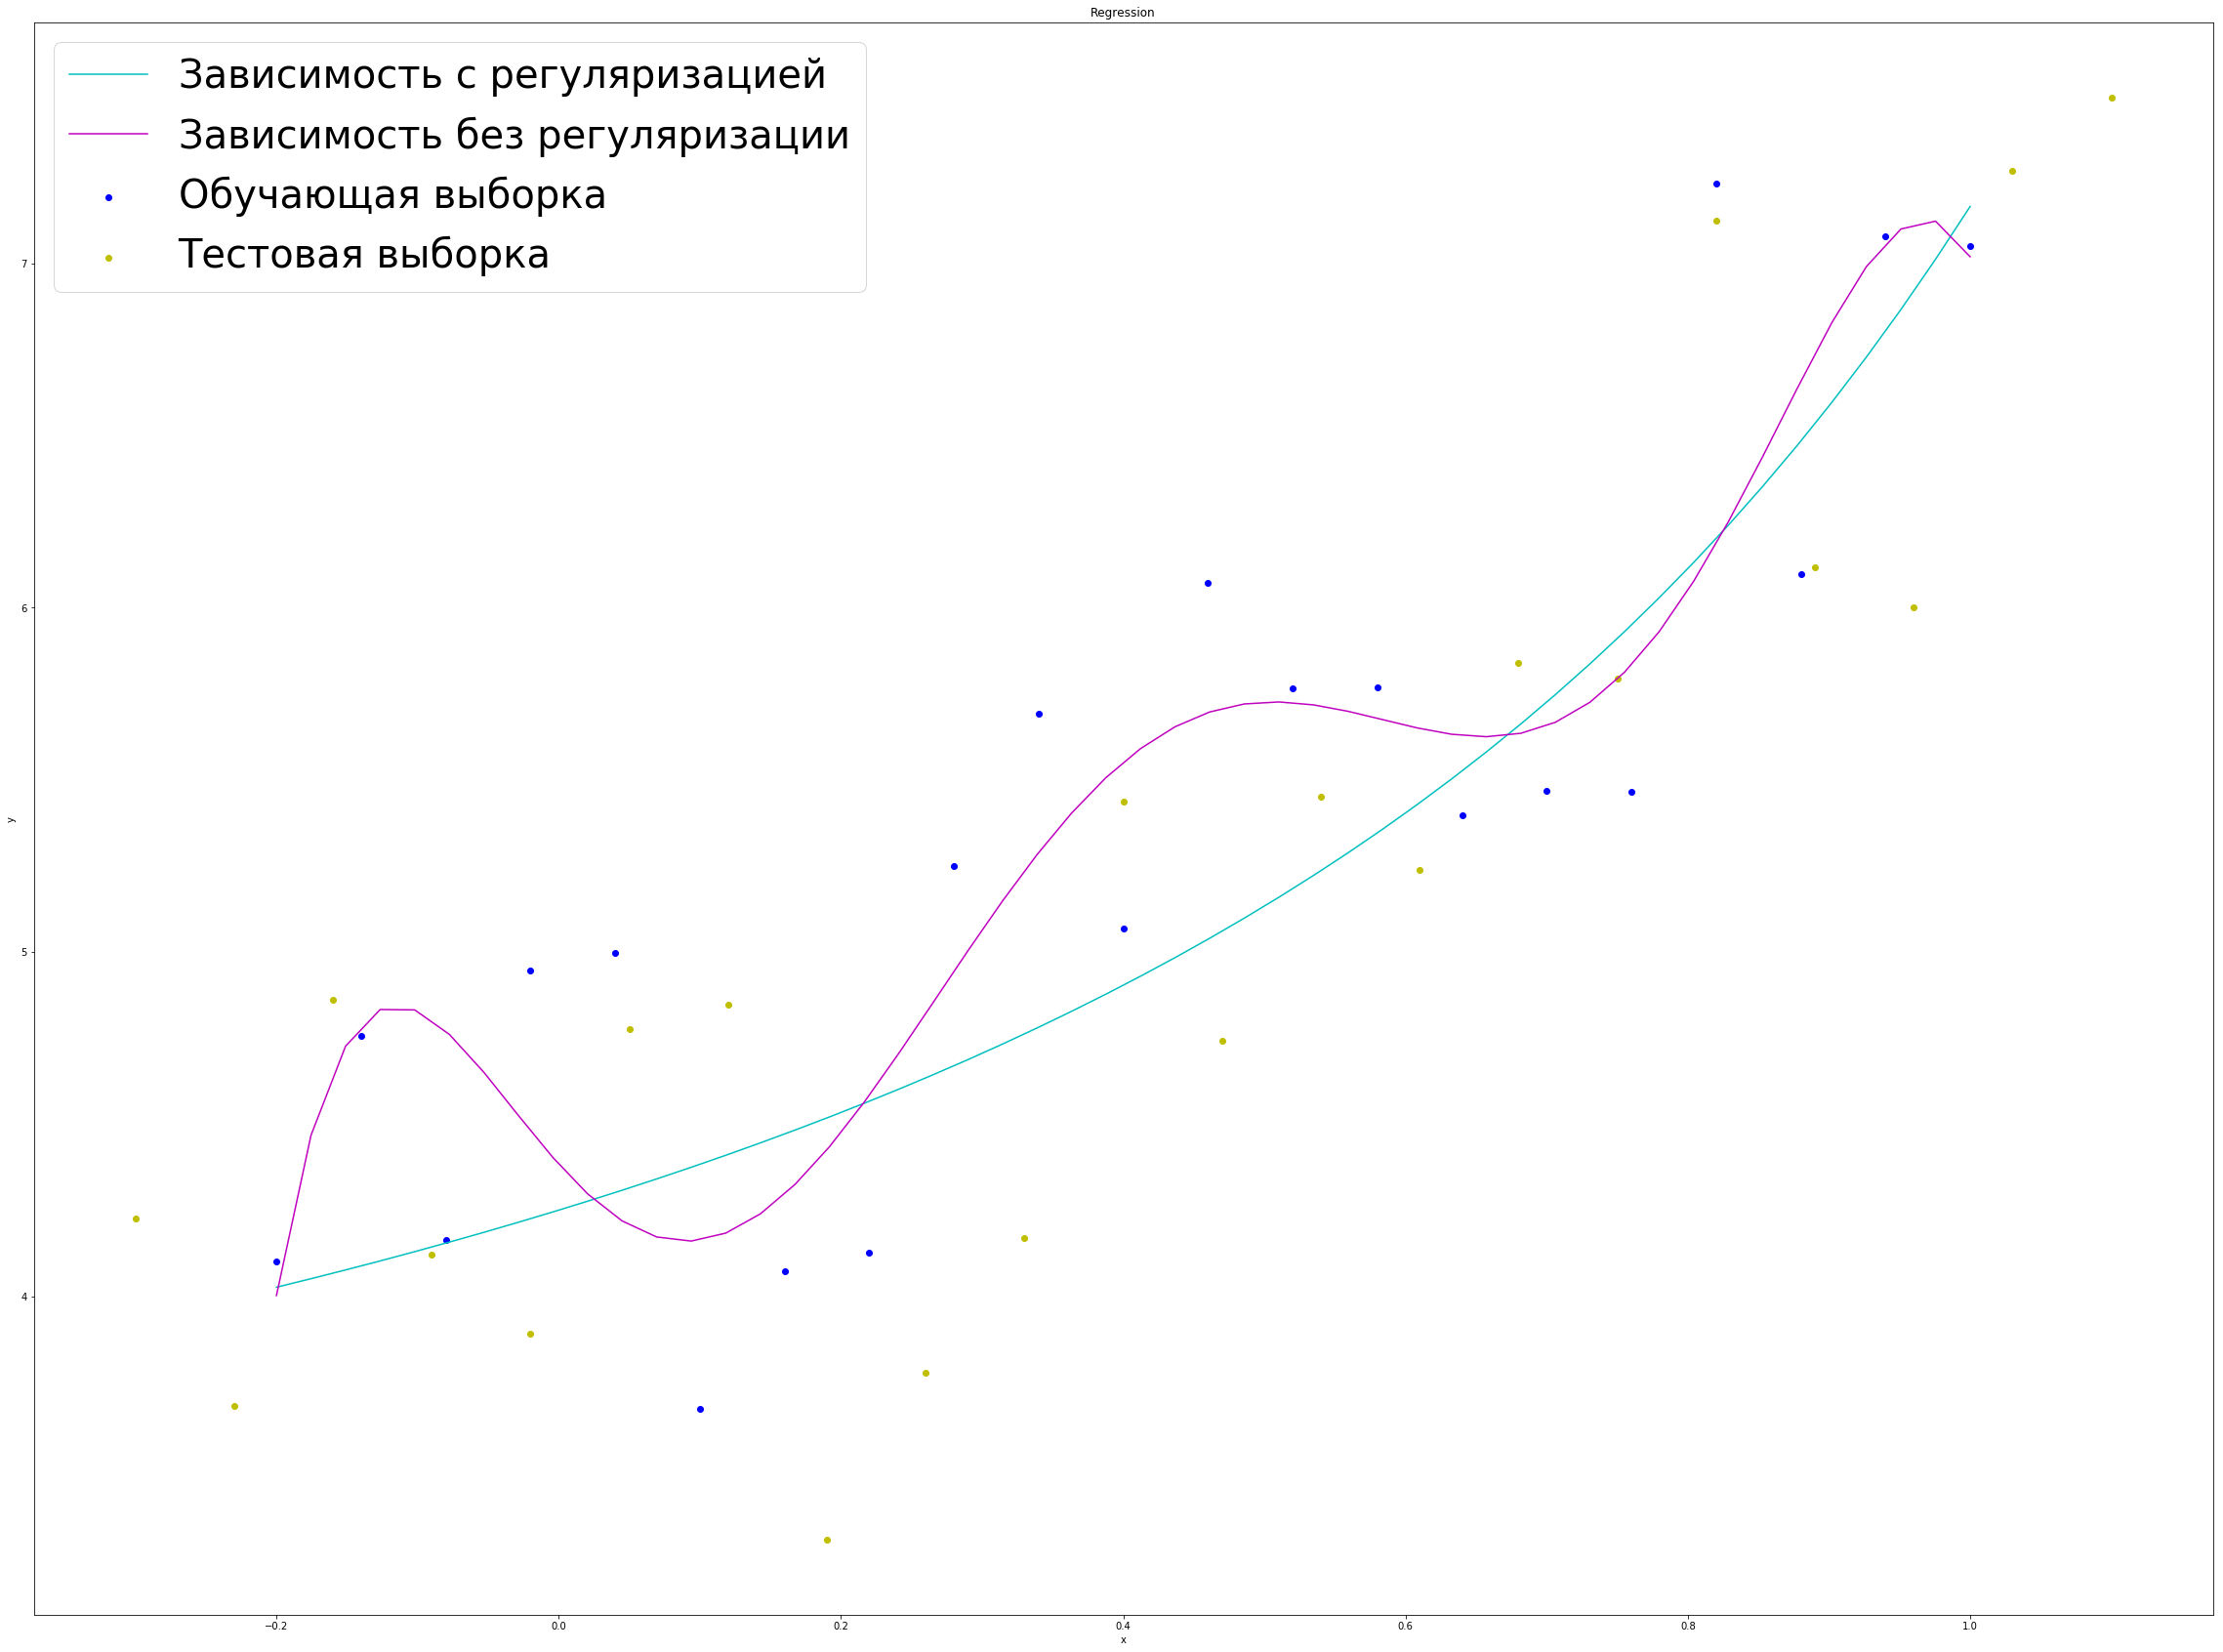

'\nОтличие видно невооруженным глазом: новый график имеет в данном диапозоне намного меньше перегибов и не пытается\nтем самым максимально подстроится под обучающие данные. Он старается более обще описать зависимость, тем самым очень\nсильно снижая переобучение и улучшая приближение на тестовых данных.\n'

In [47]:
x1 = X_train
y1 = y_train
plt.figure(figsize=(40, 30))
plt.scatter(x1, y1, color='b', label="Обучающая выборка") # рисуем точки
plt.scatter(X_test, y_test, color='y', label="Тестовая выборка")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')
x2 = np.linspace(-0.2, 1, 50)
y2 = 0
for j in range(7):
    y2 += a[j] * (x2 ** j)
plt.plot(x2, y2, color='c', label="Зависимость с регуляризацией") # бирюзовый график
plt.plot(x2, remember, color='m', label="Зависимость без регуляризации") # фиолетовый график
plt.legend(loc='upper left', fontsize=40)
plt.show()
'''
Отличие видно невооруженным глазом: новый график имеет в данном диапозоне намного меньше перегибов и не пытается
тем самым максимально подстроится под обучающие данные. Он старается более обще описать зависимость, тем самым очень
сильно снижая переобучение и улучшая приближение на тестовых данных.
'''

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**
Рассмотрим функцию $f(a) = |y - Xa|^2 + \lambda|a|^2$.
Чтобы найти минимум этой функции, надо найти ее градиент и приравнять к нулю (это необходимое условие эсктремума, как нам рассказали на последних лекциях матана)
Заметим, что $|y - Xa|^2 = |y_{1} - (x_{11}a_{1} + ... + x_{1n}a_{n}) , ... , y_{n} - (x_{n1}a_{1} + ... + x_{nn}a_{nn})|^2 = (y_{1} - (x_{11}a_{1} + ... + x_{1n}a_{n}))^2 + ... + (y_{n} - (x_{n1}a_{1} + ... + x_{nn}a_{nn}))^2$,
$\lambda|a|^2 = \lambda(a_{1}^2 + ... + a_{n}^2)$

Тогда $\nabla f(a) = (-2(\sum_{n=1}^{n} x_{i1}(y_{i} - (x_{i1}a_{1} + ... + x_{in}a_{n})) + 2a_{1}, ... , -2(\sum_{n=1}^{n} x_{in}(y_{i} - (x_{i1}a_{1} + ... + x_{in}a_{n})) + 2a_{n}) = -2X^T(y - Xa) + 2\lambda a = 0$ Поэтому $\lambda a = X^T(y - Xa) = X^Ty - X^TXa => (X^TX + \lambda E)a = X^Ty => a = (X^TX + \lambda E)^{-1}X^Ty $ 

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Мое решение**
Пусть объекты $x_{i}$ имеет вид векторов длины k. Тогда Матрица $X_{(t)}$ - матрица с t строками и k столбцами. $X^t_{(t)}$ -  матрица с k строками и t столбцами. Добавим новый вектор $x_{t+1}$ длины k, как t+1-ую строку к матрице $X_{(t)}$ (теперь $X_{(t+1)}$). Заметим, что $X^t_{(t+1)}X_{(t+1)}$ все равно что к каждой ячейке (i, j) матрицы $X^T_{(t)}X_{(t)}$ добавить слагаемое вида $x_{t+1}[i] \cdot x_{t+1}[j]$. То есть пройдя по матрице $X^T_{(t)}X_{(t)}$, имеющей размеры k на k, то есть константные, мы за O($k^2$), то есть за O(1),  получим нужную нам матрицу. Аналогично, заметим, что чтобы получить вектор $X^T_{(t+1)}y_{(t+1)}$ (в нем 1 столбец и k строк) надо к $X^T_{(t)}y_{(t)}$ к каждой ячейке (1, i) добавить слагаемое $x_{t+1}[i] \cdot y_{t+1}$. Так как таких ячеек - k, то просто пройдя по каждой за О(k), то есть за О(1), мы получим новый вектор $X^T_{(t+1)}y_{(t+1)}$.

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

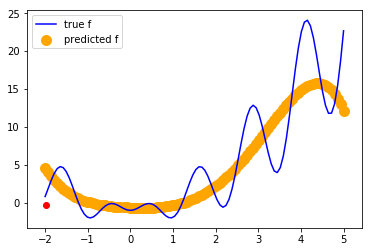

In [44]:
from IPython.display import clear_output
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    x_t = np.array([[1, x_new, x_new ** 2, x_new ** 3, x_new ** 4, x_new ** 5]])
    if (i == 0): 
        X = np.copy(x_t)
        Xtr = np.transpose(X)
        XtrX = np.dot(Xtr, X)
        XtrY = np.dot(Xtr, y_new)
    else:
        for k in range(6):
            for j in range(6):
                XtrX[k, j] += x_t[0, k] * x_t[0, j]
        for k in range(6):        
            XtrY[k, 0] += x_t[0, k] * y_new
    a = np.dot(np.linalg.inv(XtrX), XtrY)
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        y_pred = 0
        # your code goes here
        for i in range(6):
            y_pred += a[i] * (x_grid ** i)
       
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()
     

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.